# Analisis exploratorio de datos

Grupo: 1

Estudiantes:

-Constanza Olivos Fernandez

-Javier Nanco Becerra

-Nicolás Pozo Villagrán

Fecha: 20-09-2025

Version: 1.4

## Objetivos del notebook

El presente notebook tiene como objetivo realizar un análisis exploratorio de datos (EDA) sobre el conjunto de información agrícola disponible, con el fin de comprender en profundidad las características y relaciones presentes en las variables que influyen en el rendimiento del cultivo. A través de este análisis se busca obtener una primera aproximación descriptiva y visual que permita identificar patrones, tendencias y posibles anomalías en los datos, sirviendo como base para la posterior construcción y evaluación de modelos predictivos.

En primer lugar, se calculan estadísticas descriptivas que permiten resumir el comportamiento de cada variable, destacando sus medidas de tendencia central, dispersión y valores extremos. Posteriormente, mediante histogramas, boxplots y densidades se analizan las distribuciones de los datos, identificando sesgos o asimetrías relevantes. Además, se construye una matriz de correlación que facilita la detección de relaciones lineales entre las variables explicativas y el rendimiento agrícola, aportando criterios iniciales para la selección de características. Finalmente, se realiza un análisis segmentado por factores climáticos y temporales, como año, estación o región, con el propósito de evidenciar patrones diferenciales asociados a la variabilidad estacional o geográfica.

De esta manera, el notebook cumple un rol fundamental en la preparación del proyecto, ya que permite obtener información clave para la toma de decisiones en la etapa de modelado, garantizando que los algoritmos posteriores se basen en un conocimiento sólido y contextualizado de los datos.

In [1]:
# !pip install matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# ========================
# Cargar dataset desde la carpeta 'csv'
# ========================
csv_path = os.path.join('csv', 'CropYieldFieldWheat.csv')
df = pd.read_csv(csv_path)

print("✅ Dataset cargado desde la carpeta 'csv'.")

✅ Dataset cargado desde la carpeta 'csv'.


## 3.1 Estadísticas descriptivas

Se calcularon estadísticas descriptivas para las variables numéricas del dataset, incluyendo medidas de tendencia central (media, mediana), dispersión (desviación estándar, varianza), valores extremos (mínimo y máximo) y percentiles (P25, P50, P75, P90 y P95). Además, se calculó el rango como diferencia entre los valores máximos y mínimos, lo que permite observar la amplitud de variación de cada variable. Esta información facilita identificar patrones generales, valores atípicos y posibles problemas de escala entre variables.

Adicionalmente, se analizaron las variables categóricas como temporada, tipo de labranza, presencia de plagas y deficiencia de nutrientes. Para cada una se obtuvo la distribución de frecuencias y porcentajes, lo que permite comprender mejor la composición del dataset en relación con factores de manejo agrícola y condiciones experimentales.

En conjunto, estas estadísticas proporcionan una visión inicial clara de la estructura de los datos y sirven como base para posteriores análisis exploratorios y modelado predictivo.

In [4]:
# Seleccionar solo variables numéricas para las estadísticas
numeric_columns = ['Lluvia_mm', 'Horas_luz', 'Temp_media', 'Temp_max', 'Temp_min', 
                  'N_kg_ha', 'P_kg_ha', 'K_kg_ha', 'pH', 'Rendimiento_kg_ha']

numeric_df = df[numeric_columns]

# Calcular estadísticas descriptivas
stats = numeric_df.describe(percentiles=[.25, .5, .75, .90, .95]).T

# Agregar varianza y rango
stats['varianza'] = numeric_df.var()
stats['rango'] = stats['max'] - stats['min']

# Reorganizar las columnas en el orden solicitado
stats = stats[['count', 'mean', 'std', 'varianza', 'min', '25%', '50%', '75%', '90%', '95%', 'max', 'rango']]

# Renombrar las columnas en español
stats.columns = ['n', 'media', 'desv_estándar', 'varianza', 'mínimo', 'P25', 'P50', 'P75', 'P90', 'P95', 'máximo', 'rango']

# Formatear los números para mejor presentación
formatted_stats = stats.round(2)

# Mostrar la tabla de resultados
print("="*100)
print("TABLA DE ESTADÍSTICAS DESCRIPTIVAS - DATASET DE TRIGO SINTÉTICO")
print("="*100)
print(formatted_stats.to_string())
print("="*100)

# Mostrar estadísticas de variables categóricas
print("\n" + "="*60)
print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
print("="*60)

categorical_vars = ['Temporada', 'Labranza', 'Plagas', 'Deficiencia']
for var in categorical_vars:
    counts = df[var].value_counts()
    percentages = (df[var].value_counts(normalize=True) * 100).round(2)
    print(f"\n{var}:")
    for valor in counts.index:
        print(f"  {valor}: {counts[valor]} registros ({percentages[valor]}%)")

TABLA DE ESTADÍSTICAS DESCRIPTIVAS - DATASET DE TRIGO SINTÉTICO
                         n    media  desv_estándar   varianza   mínimo      P25      P50      P75      P90      P95   máximo    rango
Lluvia_mm          50000.0   454.71         205.10   42065.38   138.32   252.82   525.92   654.86   696.41   718.56   840.79   702.47
Horas_luz          50000.0    76.50           9.20      84.70    47.12    68.74    76.54    84.15    88.42    90.63   104.16    57.04
Temp_media         50000.0    17.29           2.76       7.61     8.39    15.27    17.28    19.32    20.91    21.75    27.02    18.64
Temp_max           50000.0    21.79           2.90       8.40    11.53    19.70    21.78    23.88    25.58    26.53    32.14    20.62
Temp_min           50000.0    12.80           2.90       8.40     2.57    10.71    12.80    14.88    16.57    17.52    22.96    20.39
N_kg_ha            50000.0   188.17          39.30    1544.23   120.00   154.12   188.31   222.22   242.68   249.28   256.00   136.0

Con base en estos resultados se puede concluir que el dataset presenta un buen balance en las variables categóricas de temporada y labranza, mientras que la mayoría de los registros no reporta presencia de plagas ni deficiencias nutricionales. En cuanto a las variables numéricas, se observa una variabilidad moderada en las condiciones climáticas y de suelo, siendo la lluvia y el rendimiento las que muestran mayor dispersión. El rendimiento promedio se sitúa en torno a 4.931 kg/ha, con un rango amplio que refleja diferencias en las condiciones de cultivo. Estos datos sugieren que el conjunto es representativo para analizar el impacto de factores climáticos y de manejo sobre la productividad del trigo.

## 3.2 Visualización de distribuciones

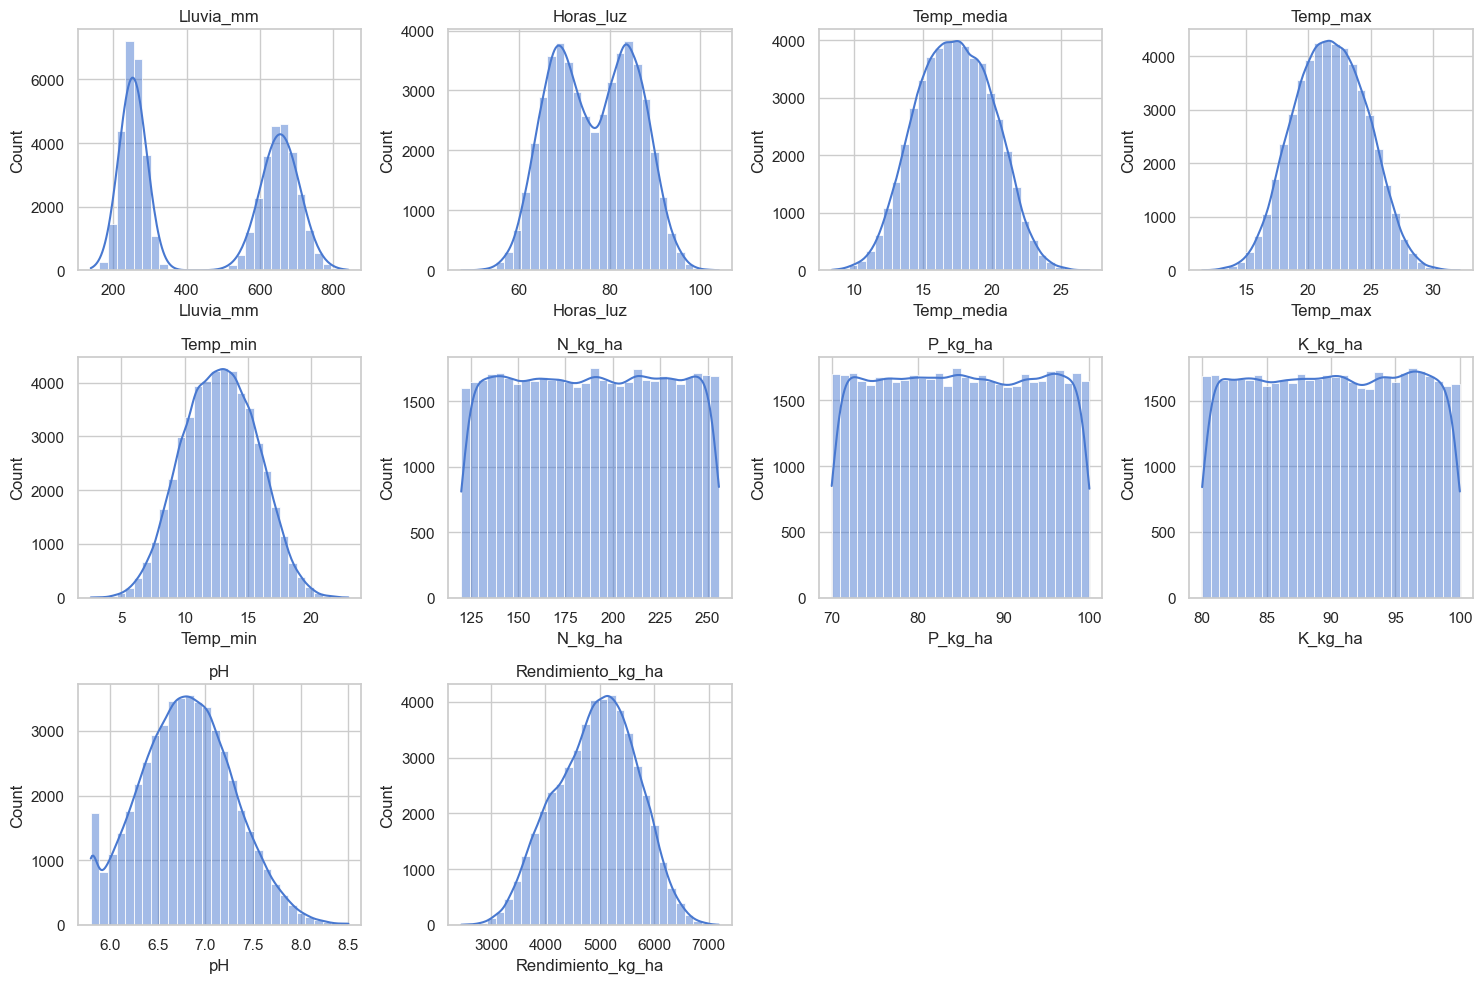

In [5]:
# Ajustes generales de seaborn
sns.set(style="whitegrid", palette="muted")

# 1. Histogramas de variables
# -----------------------
variables_numericas = ["Lluvia_mm", "Horas_luz", "Temp_media", "Temp_max", "Temp_min",
                       "N_kg_ha", "P_kg_ha", "K_kg_ha", "pH", "Rendimiento_kg_ha"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_numericas):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

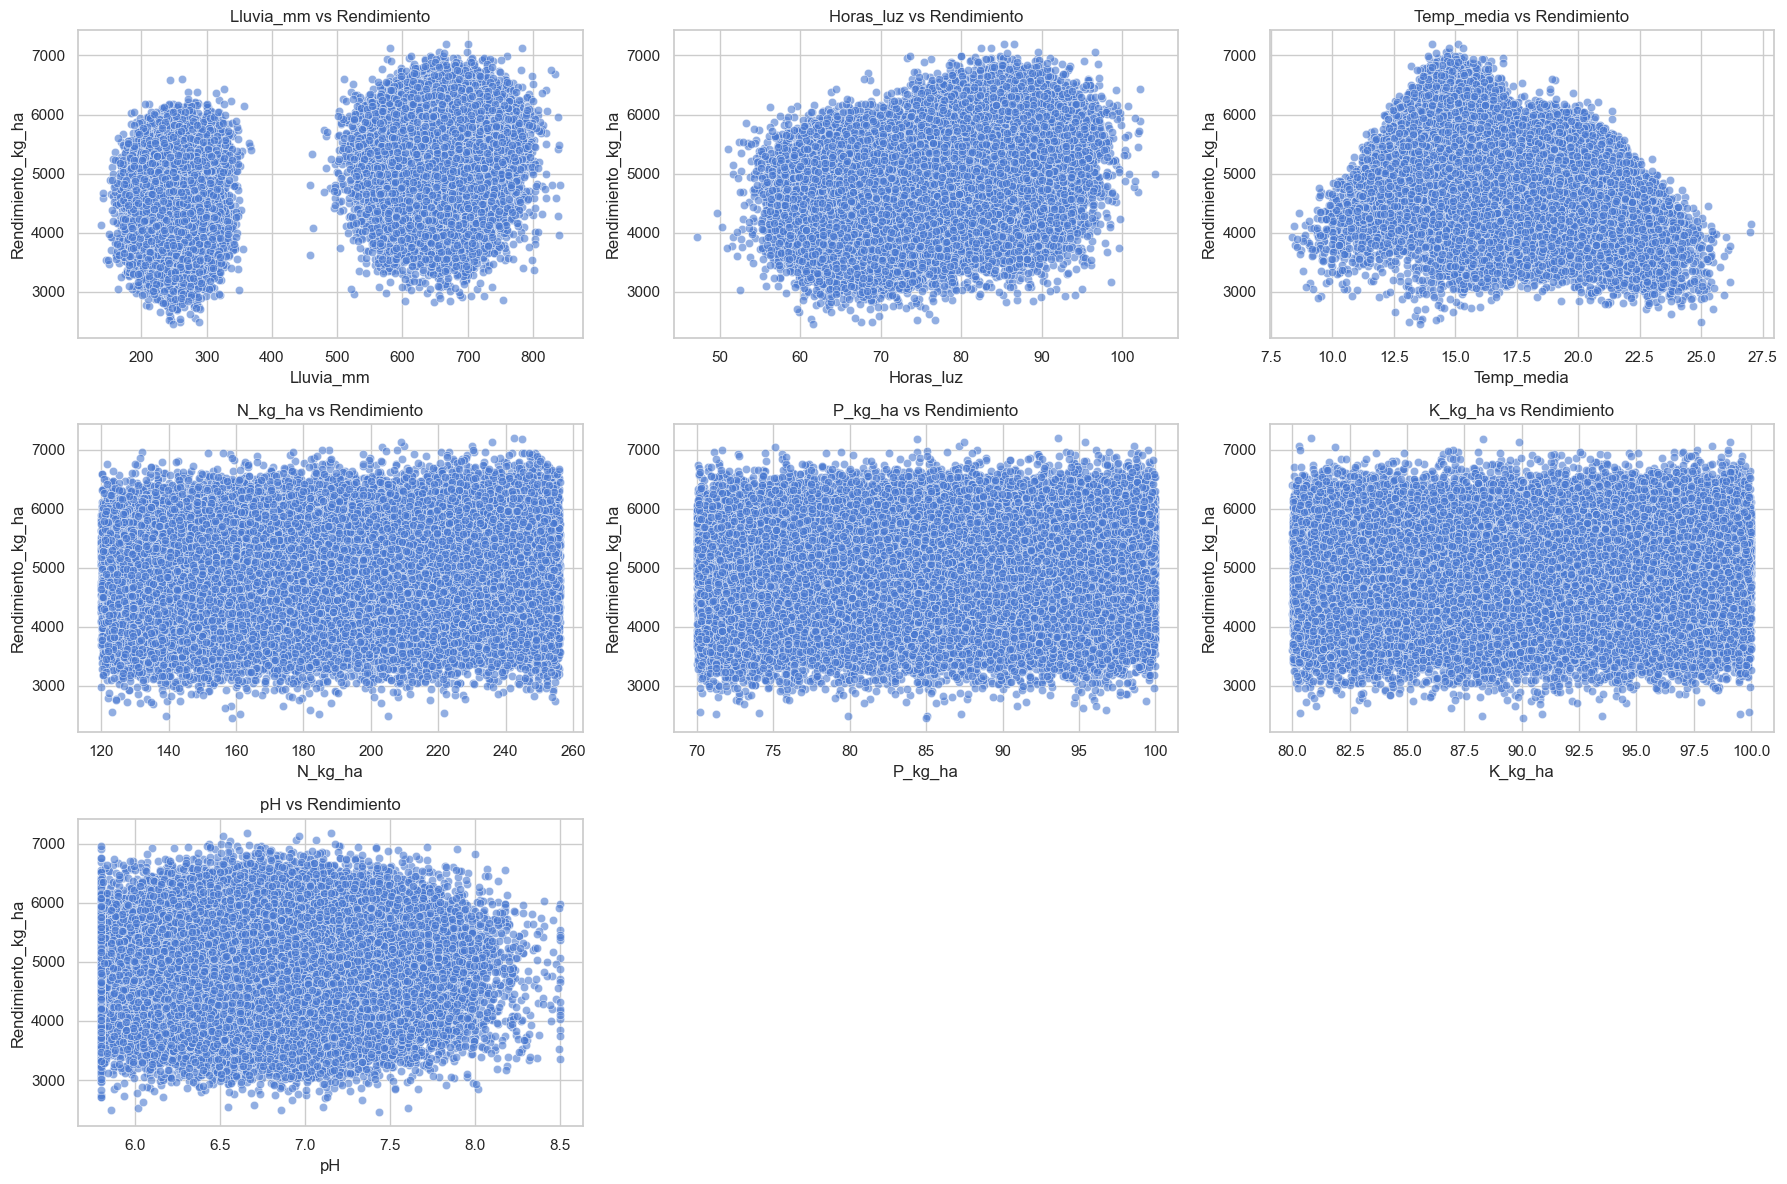

In [6]:
# -----------------------
# 2. Scatterplots de variables vs rendimiento
# -----------------------
variables_clave = ["Lluvia_mm", "Horas_luz", "Temp_media", "N_kg_ha", "P_kg_ha", "K_kg_ha", "pH"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(variables_clave):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df["Rendimiento_kg_ha"], alpha=0.6)
    plt.title(f"{col} vs Rendimiento")
plt.tight_layout()
plt.show()

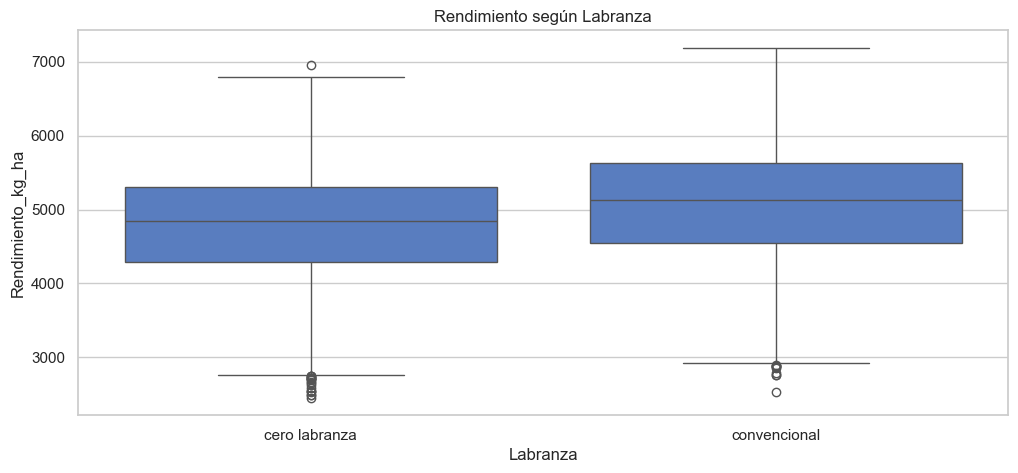

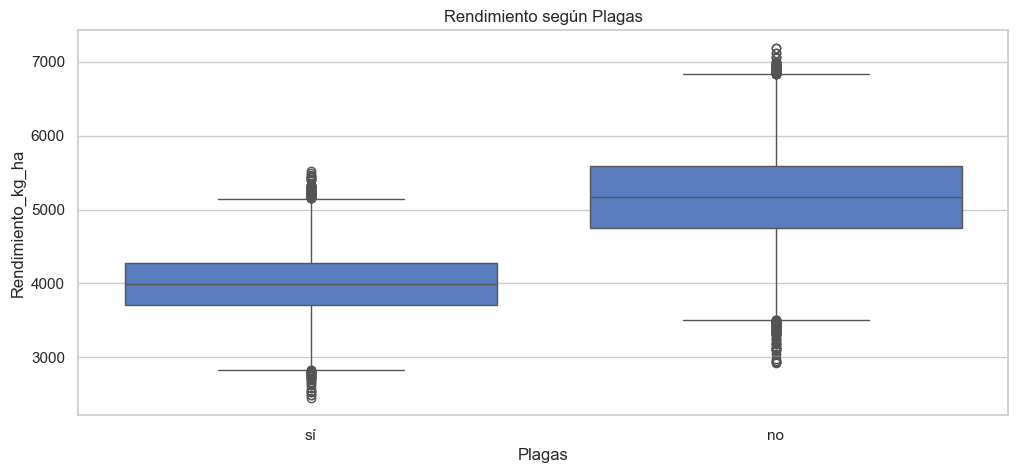

In [7]:
# -----------------------
# 3. Boxplots para variables categóricas
# -----------------------
plt.figure(figsize=(12, 5))
sns.boxplot(x="Labranza", y="Rendimiento_kg_ha", data=df)
plt.title("Rendimiento según Labranza")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="Plagas", y="Rendimiento_kg_ha", data=df)
plt.title("Rendimiento según Plagas")
plt.show()

Los gráficos exploratorios evidencian que el rendimiento de los cultivos se ve influenciado principalmente por factores climáticos y la presencia de plagas. Se observa un comportamiento no lineal con la lluvia y la temperatura, sugiriendo la existencia de valores óptimos para maximizar la productividad. Las horas de luz muestran una relación positiva con el rendimiento, mientras que los nutrientes y el pH no presentan patrones claros. Además, los boxplots confirman que la labranza convencional tiende a rendir ligeramente más que la cero labranza y que las plagas afectan de forma negativa y significativa la producción.

## 3.3 Matriz de correlación

Para complementar el análisis exploratorio, se calculó la matriz de correlación entre las variables numéricas y categóricas (codificadas mediante one-hot encoding). Este procedimiento permite identificar la fuerza y dirección de las relaciones lineales entre las variables, en particular con el rendimiento del cultivo. Además, la visualización mediante un mapa de calor facilita la detección de patrones, asociaciones relevantes y posibles redundancias en los datos.

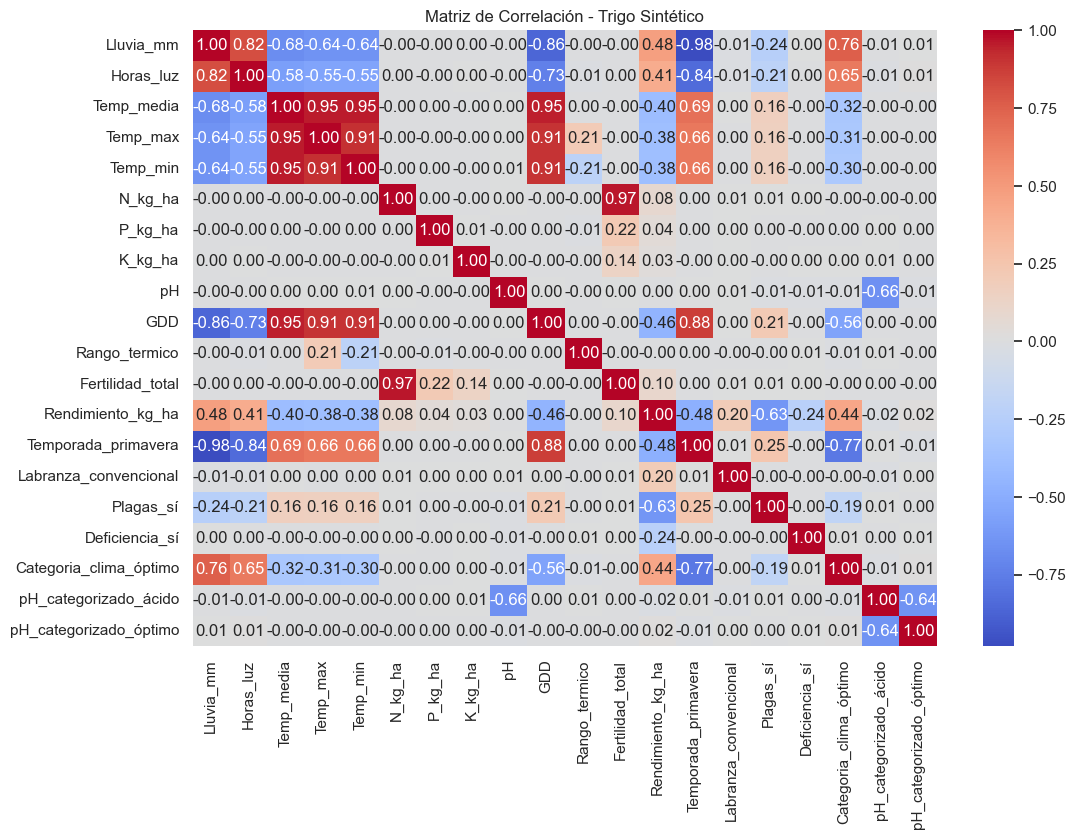


Correlación con Rendimiento_kg_ha:
Rendimiento_kg_ha         1.000000
Lluvia_mm                 0.480037
Categoria_clima_óptimo    0.439606
Horas_luz                 0.409411
Labranza_convencional     0.198587
Fertilidad_total          0.095534
N_kg_ha                   0.084558
P_kg_ha                   0.043559
K_kg_ha                   0.031812
pH_categorizado_óptimo    0.021534
pH                        0.002366
Rango_termico            -0.002965
pH_categorizado_ácido    -0.016989
Deficiencia_sí           -0.236038
Temp_min                 -0.378042
Temp_max                 -0.379312
Temp_media               -0.396318
GDD                      -0.459386
Temporada_primavera      -0.478114
Plagas_sí                -0.628976
Name: Rendimiento_kg_ha, dtype: float64


In [8]:
# 2. Convertir variables categóricas en numéricas (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Calcular la matriz de correlación
corr = df_encoded.corr(method="pearson")

# 4. Visualizar con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación - Trigo Sintético")
plt.show()

# 5. Ver correlación solo con el rendimiento
print("\nCorrelación con Rendimiento_kg_ha:")
print(corr["Rendimiento_kg_ha"].sort_values(ascending=False))

Los resultados muestran que el rendimiento del trigo se asocia positivamente con factores como la lluvia (r=0.48), las horas de luz (r=0.41) y condiciones de clima óptimo (r=0.44), lo que confirma la importancia de la disponibilidad de agua y energía solar en el crecimiento del cultivo. También se observa una leve ventaja de la labranza convencional (r=0.20). Por otro lado, variables como la presencia de plagas (r=-0.63), la temporada primavera (r=-0.48) y temperaturas extremas (mínima, máxima y media, todas con r entre -0.38 y -0.40) se correlacionan negativamente con el rendimiento, indicando que el estrés térmico y sanitario son factores limitantes importantes. Los nutrientes (N, P, K) y el pH muestran correlaciones muy bajas, lo que sugiere que no son determinantes en este conjunto de datos o que ya se encuentran en rangos adecuados.

## 3.4 Analisis por temporada y clima

En esta sección se analiza cómo varía el rendimiento del trigo en función de la temporada del año y de las condiciones climáticas asociadas, como la lluvia, la temperatura media y las horas de luz. Para ello, se utilizan gráficos de caja que muestran la distribución del rendimiento por temporada, gráficos de barras que comparan los promedios climáticos y diagramas de dispersión que permiten observar la relación entre la lluvia y el rendimiento diferenciada por estación. Este análisis busca identificar patrones estacionales y climáticos que influyan de manera significativa en la productividad del cultivo.

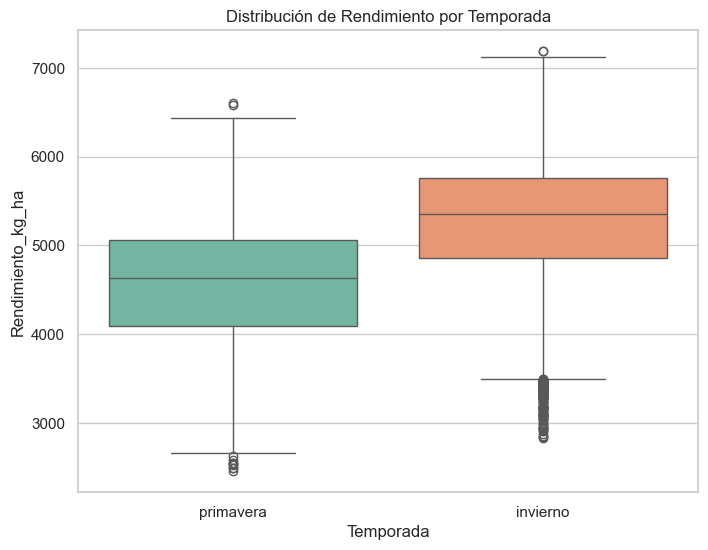

<Figure size 1000x600 with 0 Axes>

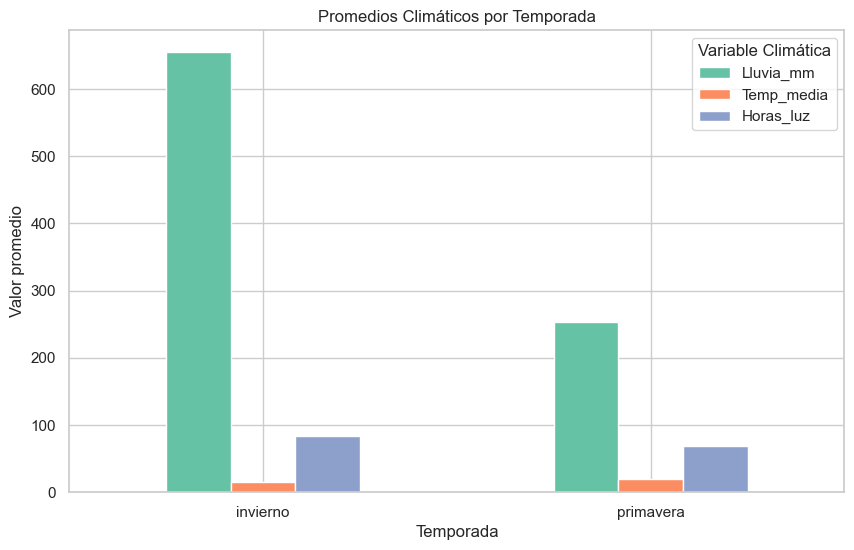

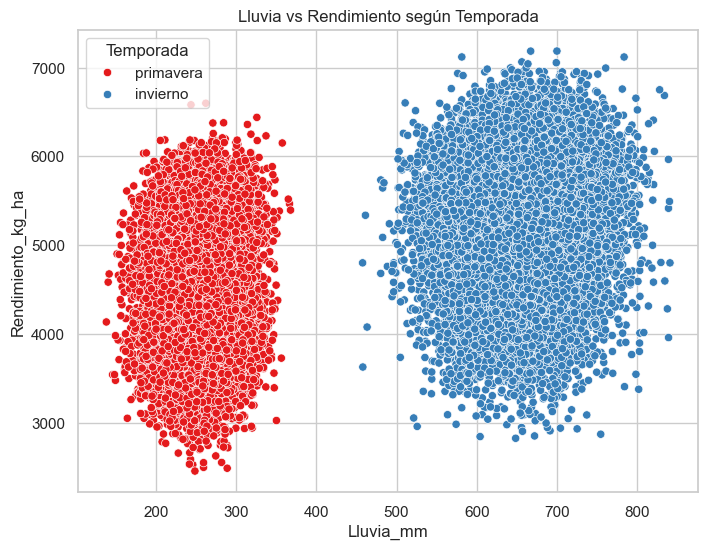

In [9]:
# Rendimiento por temporada (Boxplot sin warning)
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df, 
    x="Temporada", 
    y="Rendimiento_kg_ha", 
    hue="Temporada",       # evitar FutureWarning
    palette="Set2", 
    legend=False
)
plt.title("Distribución de Rendimiento por Temporada")
plt.show()

# Variables climáticas por temporada (Barras)
plt.figure(figsize=(10,6))
df.groupby("Temporada")[["Lluvia_mm","Temp_media","Horas_luz"]].mean().plot(
    kind="bar", 
    rot=0, 
    figsize=(10,6), 
    color=["#66c2a5", "#fc8d62", "#8da0cb"]
)
plt.title("Promedios Climáticos por Temporada")
plt.ylabel("Valor promedio")
plt.xlabel("Temporada")
plt.legend(title="Variable Climática")
plt.show()

# Relación clima vs rendimiento (Scatterplot)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="Lluvia_mm", 
    y="Rendimiento_kg_ha", 
    hue="Temporada", 
    palette="Set1"
)
plt.title("Lluvia vs Rendimiento según Temporada")
plt.show()


Los resultados muestran que el invierno es la temporada más favorable para el cultivo de trigo, alcanzando un rendimiento promedio superior y con mayor variabilidad, impulsado principalmente por niveles más altos de precipitación. En contraste, la primavera presenta menores lluvias y un rendimiento promedio más bajo, lo que evidencia la fuerte influencia del clima —en especial la precipitación— sobre la productividad del cultivo.